In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

# Stage 1

## 1. Descriptive Statistics 

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:

A. Apakah ada kolom dengan tipe data kurang sesuai?
> Semua tipe data sudah sesuai

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
> tidak ada

C. Apakah ada kolom yang isi nilainya tidak sesuai?
(contoh: kolom Name tapi isinya tanggal lahir)
> tidak ada

D. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)
> tidak ada

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [3]:
nums=['Age', 'Region_Code','Annual_Premium','Vintage']
cats=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [4]:
#Check duplicate 
df.duplicated().values.any()

False

In [5]:
#Check null
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
cats1 = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

df[cats1].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## 2. Univariate Analysis

- Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). 

- Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). 

>>Skewed positif: Age
>>Bimodal: Age 
>>Outlier: Annual Premium
>>Nilai yang mendominasi: Driving License
>>Kategori terlalu banyak: id, Region Code, Vintage, Annual Premium, >>Policy Sales Channel


- Jelaskan juga apa yang harus di-follow up saat data pre-processing.
 > drop kolom id dan Vintage
 > ubah tipe data gender, vehicle damage, vehicle age menjadi numeric

<Figure size 576x432 with 0 Axes>

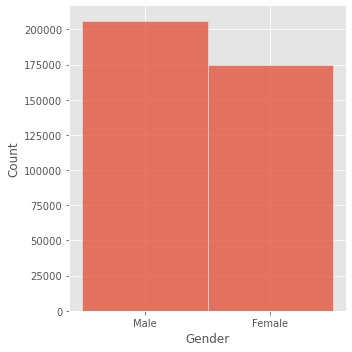

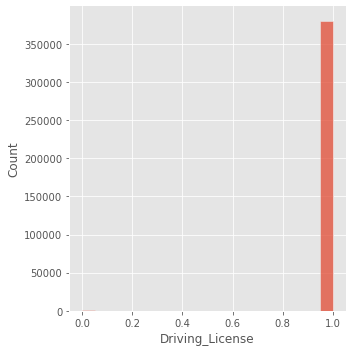

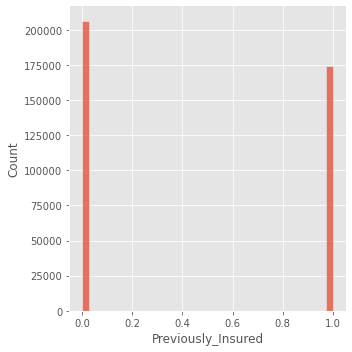

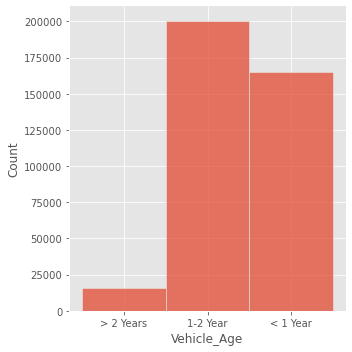

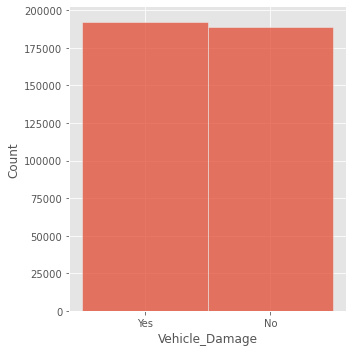

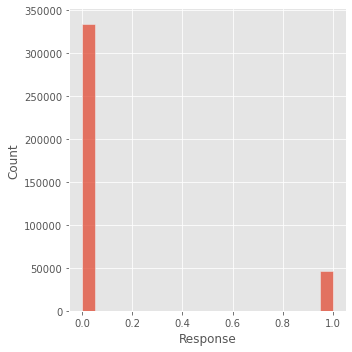

In [8]:
#Univariate Category

fig = plt.figure(figsize=[8,6])
data_rating = cats
for i in range(0, len(data_rating)):
    sns.displot(data=df[data_rating[i]])

<Figure size 576x432 with 0 Axes>

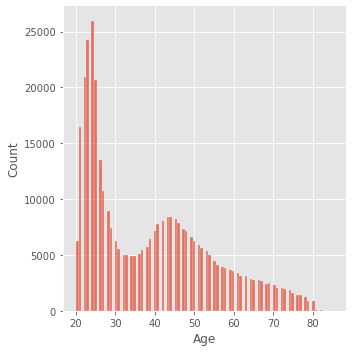

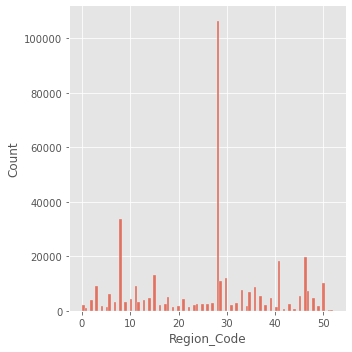

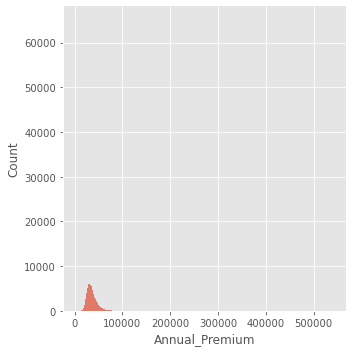

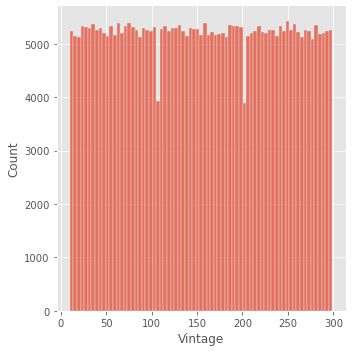

In [9]:
#Univariate Numerical

fig = plt.figure(figsize=[8,6])
data_rating = nums
for i in range(0, len(data_rating)):
    sns.displot(data=df[data_rating[i]])

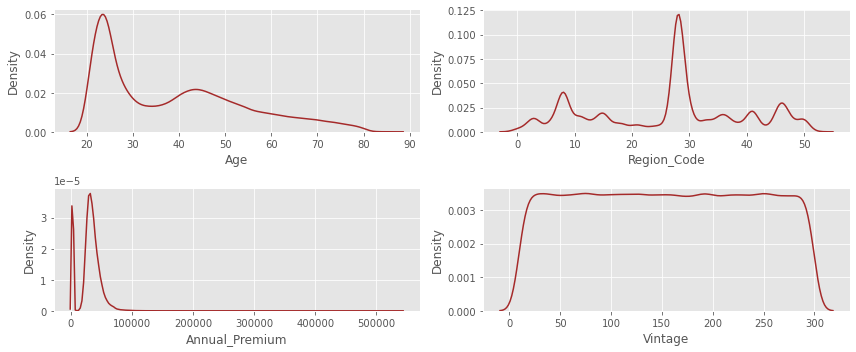

In [10]:
#Univariate Numerical (DISTPLOT)

features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.kdeplot(x=df[features[i]], color='brown')
    plt.xlabel(features[i])
    plt.tight_layout()

<AxesSubplot:ylabel='Annual_Premium'>

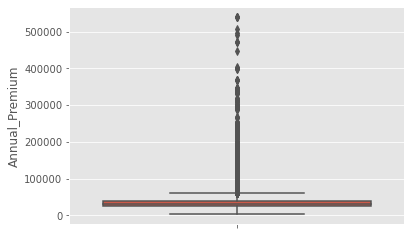

In [11]:
# ANNUAL PREMIUM (Outlier)

sns.boxplot(y = 'Annual_Premium', data = df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

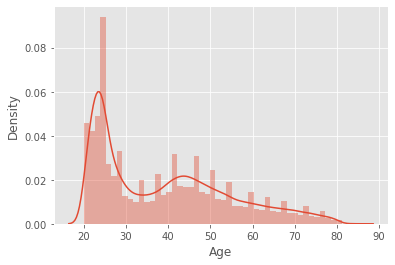

In [12]:
# AGE (Skewed & Bimodal)

sns.distplot(df.Age)

<AxesSubplot:xlabel='Response', ylabel='count'>

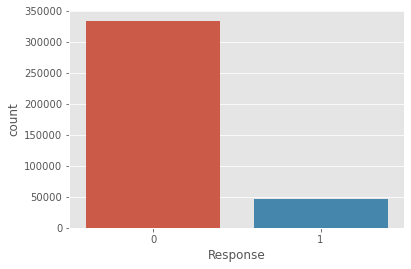

In [13]:
# RESPONSE

sns.countplot(x=df['Response'])

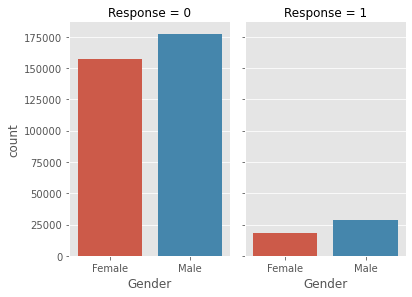

In [14]:
# GENDER & RESPONSE

df = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
gr = sns.catplot(x='Gender', y='count',col='Response',
                data=df, kind='bar',
                height=4, aspect=.7)

In [3]:
# RESPONSE & VEHICLE AGE

df = df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


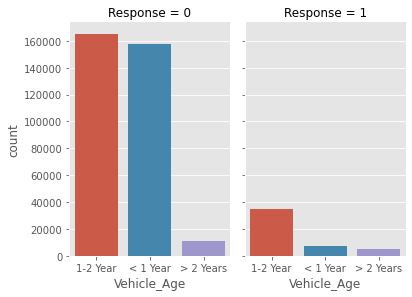

In [4]:
# RESPONSE & VEHICLE AGE  

var = sns.catplot(x='Vehicle_Age', y='count',col='Response',
                data=df, kind='bar',
                height=4, aspect=.7)

In [4]:
# RESPONSE & VEHICLE DAMAGE

df = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


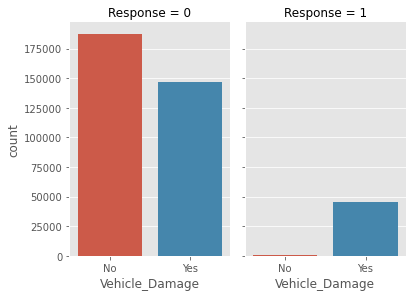

In [5]:
# RESPONSE & VEHICLE DAMAGE

vdr = sns.catplot(x='Vehicle_Damage', y='count',col='Response',
                  data=df, kind='bar',
                  height=4, aspect=.7)

In [4]:
# Previously Insured & Response

df = df.groupby(['Previously_Insured','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Previously_Insured,Response,count
0,0,0,159929
1,0,1,46552
2,1,0,174470
3,1,1,158


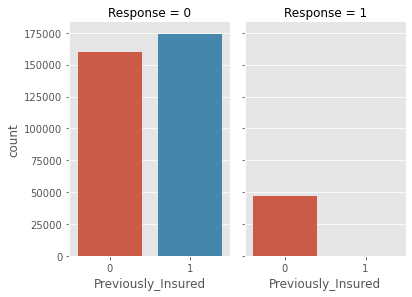

In [5]:
# Previously Insured & Response

pir = sns.catplot(x='Previously_Insured', y='count',col='Response',
                  data=df, kind='bar',
                  height=4, aspect=.7)

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Previously_Insured'>

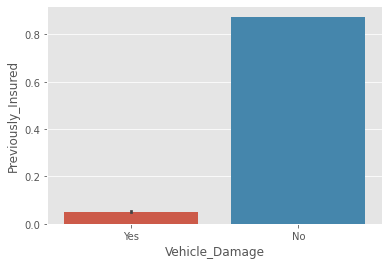

In [6]:
#Vehicle Damage & Previously Insured

sns.barplot(y= 'Previously_Insured', x='Vehicle_Damage', data=df)

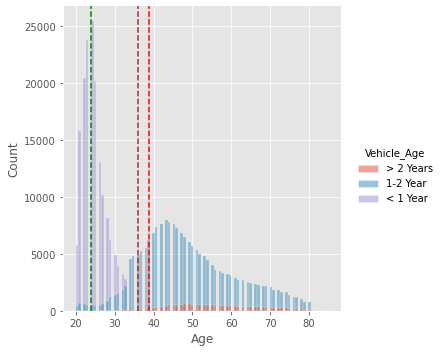

In [7]:
#Vehicle Age & Age

sns.displot(x= 'Age', hue='Vehicle_Age', data=df)


meanX = df['Age'].mean()
medianX = df['Age'].median()
modeX = df['Age'].mode()[0]

plt.axvline(meanX, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(medianX, color = 'brown', linestyle = '--', label = 'Median')
plt.axvline(modeX, color = 'green', linestyle = '--', label = 'Mode')

## 3. Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

> Secara keseluruhan korelasi antar feature rendah. Namun, terdapat 5 fitur yang relevan dengan fitur response, yakni: 
>>1. Response - Vehicle Damage (0.35)
>>2. Response - Previously Insured (0.34) 
>>3. Response - Vehicle Age (0.22)
>>4. Response - Policy Sales Channel (0.14)
>>5. Response - Age (0.11)




B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
> Secara keseluruhan korelasi antar feature rendah. Feature yang menarik adalah korelasi antar fitur Response dan Vehicle Damage. Kita akan melakukan One Hot Encoding terhadap fitur-fitur tersebut, yang dimana diharapkan dapat menghasilkan performance yang sesuai dengan ekspetasi.




In [8]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [9]:
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [10]:
df['Gender2'] = np.where(df['Gender']=='Female', 1, 0)
df['VA2'] = np.where(df['Vehicle_Age']=='> 2 Years', 2,
                    np.where(df['Vehicle_Age']=='1-2 Year', 1, 0))
df['VD2'] = np.where(df['Vehicle_Damage']=='Yes', 1, 0)

df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender2,VA2,VD2
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,2,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,2,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,0,1,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,0,0,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0,0,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1,2,1


<AxesSubplot:>

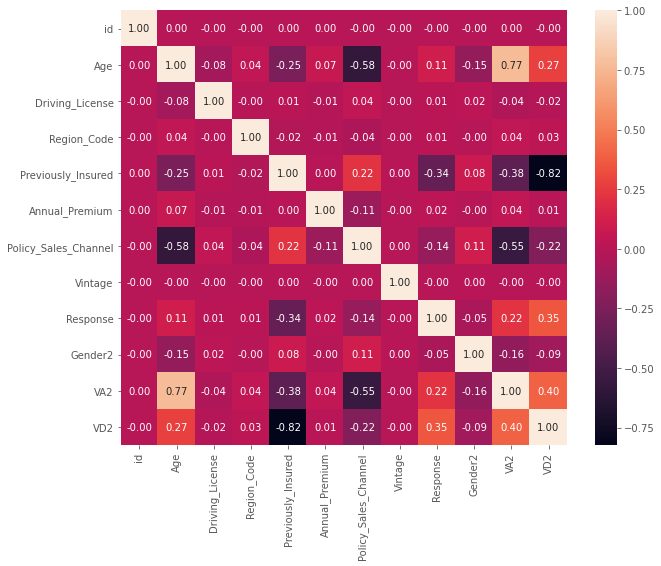

In [12]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

# Stage 2

- Eksplorasi berbagai attributes
- Target output olahan data
- Mengecek apakah ada data bermasalah 
- Handling missing value 
- Handling duplicated data 
- Handling outlier data 
- Handling imbalanced data 
- Handling data redundan
- Handling data bermasalah lainnya 
- Penjelasan proses handling untuk setiap data yang bermasalah

In [5]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [3]:
nums=['Age', 'Region_Code','Annual_Premium','Vintage']
cats=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [3]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [3]:
category = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

df[category].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## Target Output (Response)

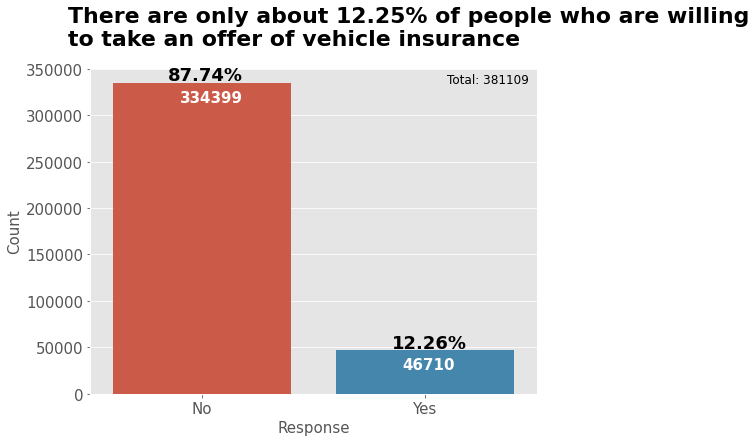

In [136]:
#Response

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot('Response', data = df, ax = ax)
plt.xticks(ticks = [0, 1], labels = ['No','Yes'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Response',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

percentage_response = []
count = []
count.append(df['Response'].value_counts().reset_index()['Response'][0])
count.append(df['Response'].value_counts().reset_index()['Response'][1])
total = sum(count)
percentage_response.append(count[0]/(count[0]+count[1]) * 100)
percentage_response.append(count[1]/(count[0]+count[1]) * 100)

for i in range(0,len(percentage_response)):
    plt.text(x = i - 0.10
             , y = count[i] - 20000
             , s=str(round(count[i]))
             , fontsize=15 
             , fontweight='bold'
             , color = 'white')
    plt.text(x = i - 0.15
             , y = count[i] + 3000
             , s=str(round(percentage_response[i], 2)) + '%'
             , fontsize=18 
             , fontweight='bold')
plt.text(x =1.1, y= 335000, s = 'Total: ' + str(total), fontsize = 12)

plt.text(x =-0.6, y= 400000, s = 'There are only about 12.25% of people who are willing', fontweight = 'bold', fontsize = 22)
plt.text(x =-0.6, y= 375000, s = 'to take an offer of vehicle insurance', fontweight = 'bold', fontsize = 22)

plt.savefig('responsecount.png', bbox_inches = 'tight')

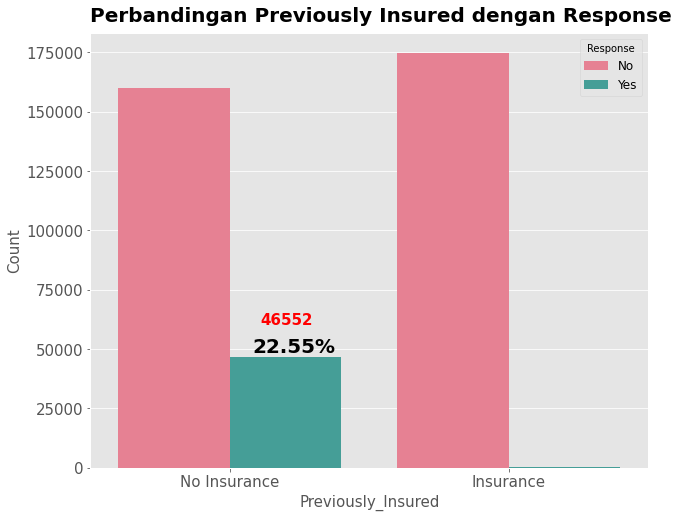

In [12]:
# Response dengan Previously Insured

fig, ax=plt.subplots(figsize=(10,8))
sns.countplot('Previously_Insured',hue='Response',data=df ,ax=ax,palette='husl')
#plt.xticks(fontsize=15)
plt.xticks(ticks = [0, 1], labels = ['No Insurance','Insurance'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Previously_Insured',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

plt.text(x =-0.5, y= 188000, s = 'Perbandingan Previously Insured dengan Response', fontweight = 'bold', fontsize = 20)
plt.legend(title = 'Response', labels = ['No','Yes'], fontsize = 12)


df_total = df.groupby('Previously_Insured').count().reset_index()
total = []
total.append(df_total.iloc[0,1])

df_year = df[df['Response']==1].groupby('Previously_Insured').count().reset_index()
percentage_year = []
percentage_year.append(df_year.iloc[0,1]*100/total[0])

count = []
count.append(df_year.iloc[0,1])

for i in range(0,len(percentage_year)):
    plt.text(x = i + 0.11
             , y = count[i] + 14000
             , s=str(round(count[i]))
             , fontsize=15 
             , fontweight='bold'
             , color = 'red')
    plt.text(x = i + 0.08
             , y = count[i] + 2000
             , s=str(round(percentage_year[i],2)) + '%'
             , fontsize=20
             , fontweight='bold')

Respon 1, insurance 0 (22,5) = 46552
Respon 0, insurance 0 (77,45) = 159929

Respon 1, insurance 1 (0,09) = 158
Respon 0, insurance 1 (99.91) = 174470

Text(2.9, 32000, 'confirmed to take insurance')

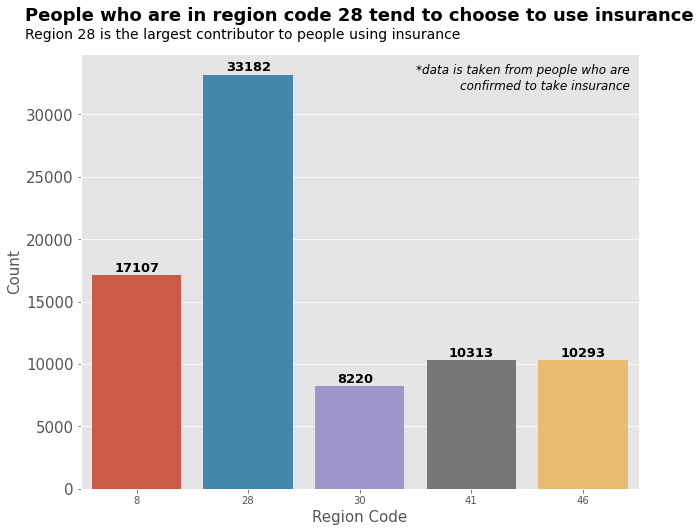

In [99]:
#Previously_Insured with Region Code

df_insight_region = df[df['Previously_Insured'] == 1].groupby('Region_Code').count().reset_index().sort_values('Response', ascending = False).head(5)
df_insight_region['Region_Code'] = df_insight_region['Region_Code'].astype(int)

plt.figure(figsize = (10,8))
sns.barplot(x = 'Region_Code', y = 'Previously_Insured', data =df_insight_region)
#plt.xticks(ticks = [0,1,2,3,4], labels = ['Bakhpat', 'Rae Bareli', 'Agra', 'Barabanki', 'Chitrakoot'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Region Code',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

# df_insight_region
cnt_insight_region = list(df_insight_region.sort_values('Region_Code')['Previously_Insured'])
reg_insight_region = list(df_insight_region.sort_values('Region_Code')['Region_Code'])

for i in range(0,len(cnt_insight_region)):
    plt.text(x = i -0.2
             , y = cnt_insight_region[i] + 300
             , s=str(cnt_insight_region[i])
             , fontsize=13 
             , fontweight='bold')
    
plt.text(x =-1, y= 37500, s = 'People who are in region code 28 tend to choose to use insurance', fontweight = 'bold', fontsize = 18)
plt.text(x =-1, y= 36100, s = 'Region 28 is the largest contributor to people using insurance ', fontsize = 14)
plt.text(x =2.5, y= 33300, s = '*data is taken from people who are',fontstyle = 'italic', fontsize = 12)
plt.text(x =2.9, y= 32000, s = 'confirmed to take insurance',fontstyle = 'italic', fontsize = 12)


In [5]:
df[(df['Region_Code'] == 28.0)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
13,14,Male,76,1,28.0,0,1-2 Year,Yes,36770.0,13.0,15,0
14,15,Male,71,1,28.0,1,1-2 Year,No,46818.0,30.0,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381095,381096,Male,52,1,28.0,0,1-2 Year,Yes,38323.0,124.0,69,0
381097,381098,Female,38,1,28.0,0,1-2 Year,Yes,52742.0,26.0,165,1
381099,381100,Female,51,1,28.0,0,1-2 Year,Yes,44504.0,26.0,71,0
381100,381101,Female,29,1,28.0,0,< 1 Year,Yes,49007.0,124.0,137,0


Text(-0.8, 210000, 'more about taking out insurance')

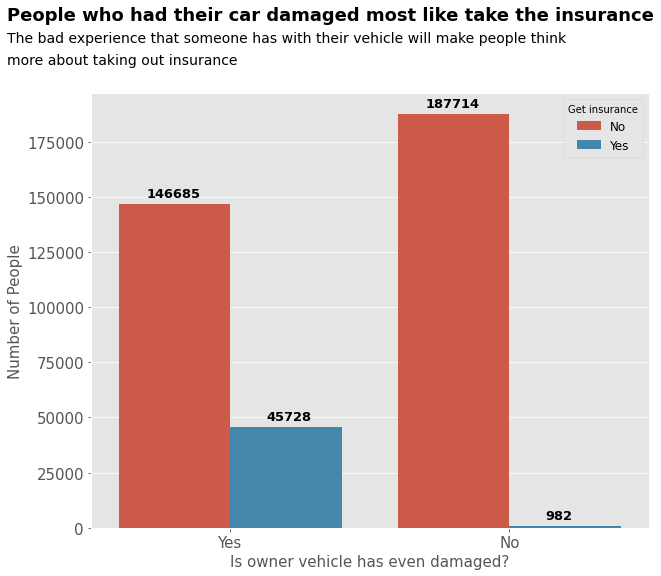

In [140]:
#Response with VD

plt.figure(figsize=(10,8))
sns.countplot('Vehicle_Damage', hue ='Response', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Is owner vehicle has even damaged?',fontsize=15)
plt.ylabel(ylabel = 'Number of People',fontsize=15)
plt.legend(title = 'Get insurance', labels = ['No','Yes'], fontsize = 12)
df_insight_damage = df.groupby(['Vehicle_Damage','Response'])['id'].count().reset_index().rename(columns={'id' : 'count'})
res_insight_damage = list(df_insight_damage['Response'])
dam_insight_damage = list(df_insight_damage['Vehicle_Damage'])
count_insight_damage = list(df_insight_damage['count'])
for i in range(0,len(res_insight_damage)):
    plt.text(x = (0 if dam_insight_damage[i] == 'Yes' else 1) + (-0.3 if res_insight_damage[i]%2 == 0 else 0.13) 
             , y = count_insight_damage[i] +3000
             , s=str(count_insight_damage[i])
             , fontsize=13 
             , fontweight='bold')

plt.text(x =-0.8, y= 230000, s = 'People who had their car damaged most like take the insurance', fontweight = 'bold', fontsize = 18)
plt.text(x =-0.8, y= 220000, s = 'The bad experience that someone has with their vehicle will make people think ', fontsize = 14)
plt.text(x =-0.8, y= 210000, s = 'more about taking out insurance', fontsize = 14)


Text(-0.9, 21500, 'to take part in the insurance program are 18.71% (19917)')

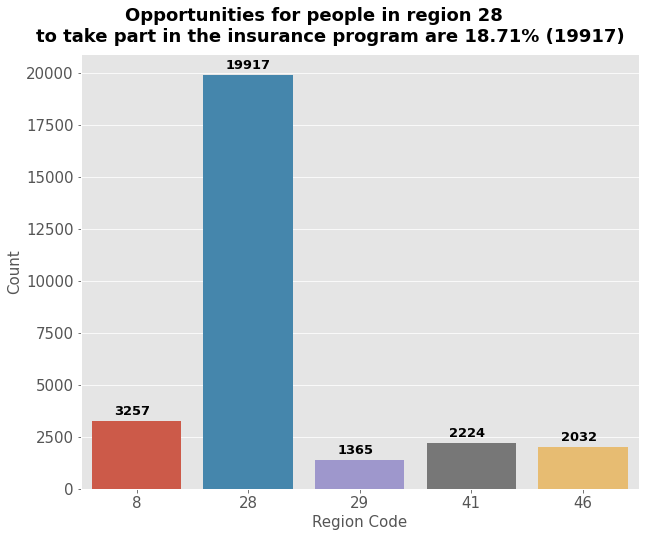

In [91]:
#Response with Region Code

df_insight_region = df[df['Response'] == 1].groupby('Region_Code').count().reset_index().sort_values('Response', ascending = False).head(5)
df_insight_region['Region_Code'] = df_insight_region['Region_Code'].astype(int)

plt.figure(figsize = (10,8))
sns.barplot(x = 'Region_Code', y = 'Response', data =df_insight_region)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Region Code',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

# df_insight_region
cnt_insight_region = list(df_insight_region.sort_values('Region_Code')['Response'])
reg_insight_region = list(df_insight_region.sort_values('Region_Code')['Region_Code'])

for i in range(0,len(cnt_insight_region)):
    plt.text(x = i -0.2
             , y = cnt_insight_region[i] + 300
             , s=str(cnt_insight_region[i])
             , fontsize=13 
             , fontweight='bold')
    
plt.text(x =-0.1, y= 22500, s = 'Opportunities for people in region 28 ', fontweight = 'bold', fontsize = 18)
plt.text(x =-0.9, y= 21500, s = 'to take part in the insurance program are 18.71% (19917)', fontweight = 'bold', fontsize = 18)

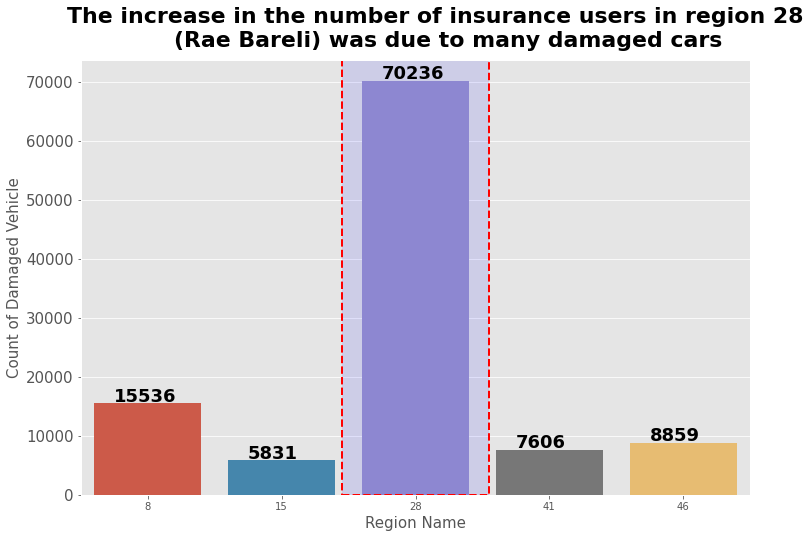

In [113]:
#Vehicle_Damage Yes with Region Code

df_insight_region = df[df['Vehicle_Damage'] == 'Yes'].groupby('Region_Code').count().reset_index().sort_values('Vehicle_Damage', ascending = False).head(5)
df_insight_region['Region_Code'] = df_insight_region['Region_Code'].astype(int)

fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(x = 'Region_Code', y = 'Vehicle_Damage', data =df_insight_region, ax = ax)
#plt.xticks(ticks = [0,1,2,3,4], labels = ['Bakhpat', 'Agra', 'Rae Bareli', 'Chitrakoot', 'Barabanki'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Region Name',fontsize=15)
plt.ylabel(ylabel = 'Count of Damaged Vehicle',fontsize=15)


# df_insight_region
cnt_insight_region = list(df_insight_region.sort_values('Region_Code')['Response'])
reg_insight_region = list(df_insight_region.sort_values('Region_Code')['Region_Code'])

for i in range(0,len(cnt_insight_region)):
    plt.text(x = i -0.25
             , y = cnt_insight_region[i] + 300
             , s=str(cnt_insight_region[i])
             , fontsize=18 
             , fontweight='bold')
    
plt.text(x =-0.6, y= 80000, s = 'The increase in the number of insurance users in region 28', fontweight = 'bold', fontsize = 22)
plt.text(x =0.2, y= 76000, s = '(Rae Bareli) was due to many damaged cars', fontweight = 'bold', fontsize = 22)

from matplotlib.patches import Rectangle
import matplotlib.patches as patches
ax.add_patch(Rectangle((1.45, 0), 1.1, 75000, fill=True, facecolor ='blue', alpha=0.1))
ax.add_patch(Rectangle((1.45, 0), 1.1, 75000, fill=None, edgecolor='red', alpha=1, linestyle = '--', linewidth = 2))

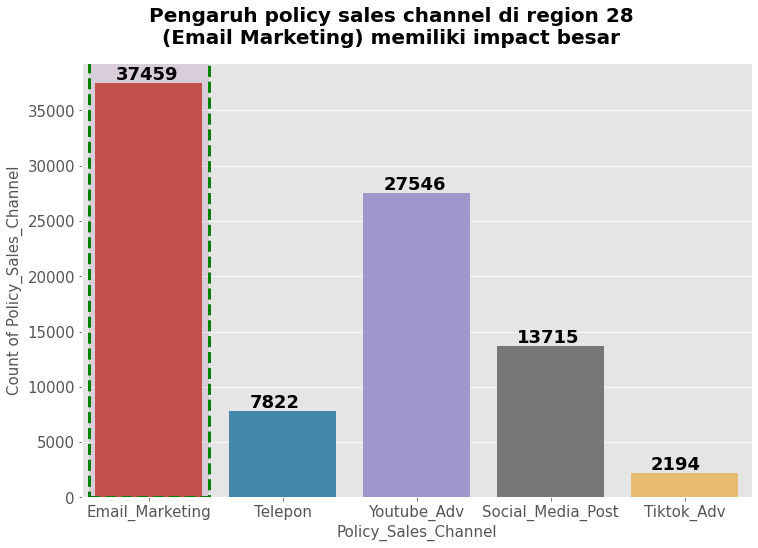

In [14]:
#Policy_Sales_Channel Yes with Region Code

df_insight_region = df[df['Region_Code'] == 28.0].groupby('Policy_Sales_Channel').count().reset_index().sort_values('Vehicle_Damage', ascending = False).head(5)
df_insight_region
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(x = 'Policy_Sales_Channel', y = 'Region_Code', data =df_insight_region, ax = ax)
plt.xticks(ticks = [0,1,2,3,4], labels = ['Email_Marketing', 'Telepon', 'Youtube_Adv', 'Social_Media_Post', 'Tiktok_Adv'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Policy_Sales_Channel',fontsize=15)
plt.ylabel(ylabel = 'Count of Policy_Sales_Channel',fontsize=15)

# df_insight_region
cnt_insight_region = list(df_insight_region.sort_values('Policy_Sales_Channel')['Response'])
reg_insight_region = list(df_insight_region.sort_values('Policy_Sales_Channel')['Policy_Sales_Channel'])

for i in range(0,len(cnt_insight_region)):
    plt.text(x = i -0.25
             , y = cnt_insight_region[i] + 300
             , s=str(cnt_insight_region[i])
             , fontsize=18 
             , fontweight='bold')
    
plt.text(x =0, y= 43000, s = 'Pengaruh policy sales channel di region 28', fontweight = 'bold', fontsize = 20)
plt.text(x =0.1, y= 41000, s = '(Email Marketing) memiliki impact besar', fontweight = 'bold', fontsize = 20)

from matplotlib.patches import Rectangle
import matplotlib.patches as patches
ax.add_patch(Rectangle((-0.45, 0), 0.9, 75000, fill=True, facecolor ='purple', alpha=0.1))
ax.add_patch(Rectangle((-0.45, 0), 0.9, 75000, fill=None, edgecolor='green', alpha=1, linestyle = '--', linewidth = 3))

Text(65, 0.048, 'with 925 people')

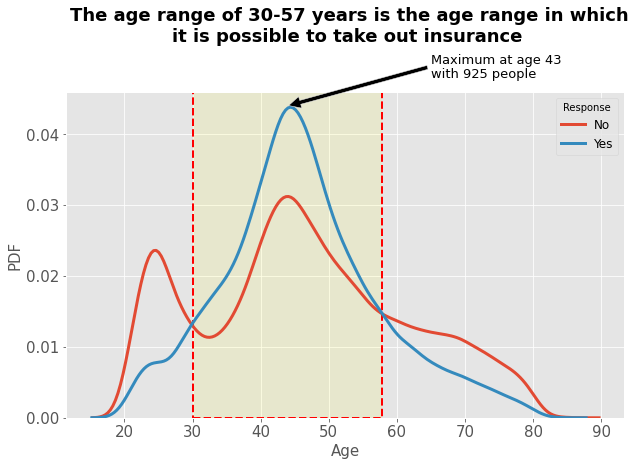

In [237]:
#Response & Age

fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(df[df['Response'] == 0]['Age'][df['Region_Code'] == 28.0],hist = False, kde_kws ={"lw" :3}, ax = ax)
sns.distplot(df[df['Response'] == 1]['Age'][df['Region_Code'] == 28.0],hist = False, kde_kws ={"lw" :3}, ax = ax)
plt.legend(title = 'Response', labels = ['No', 'Yes'], fontsize = 12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Age',fontsize=15)
plt.ylabel(ylabel = 'PDF',fontsize=15)

from matplotlib.patches import Rectangle
import matplotlib.patches as patches
ax.add_patch(Rectangle((30, 0), 27.8, 0.07, fill=True, facecolor ='yellow', alpha=0.1))
ax.add_patch(Rectangle((30, 0), 27.8, 0.07, fill=None, edgecolor='red', alpha=1, linestyle = '--', linewidth = 2))

plt.text(x =12, y= 0.056, s = 'The age range of 30-57 years is the age range in which ', fontweight = 'bold', fontsize = 18)
plt.text(x =27, y= 0.053, s = 'it is possible to take out insurance', fontweight = 'bold', fontsize = 18)

countmax_age = df[df['Response'] == 1][df['Region_Code'] == 28.0].groupby('Age').count().reset_index().sort_values('id', ascending = False).iloc[0,1]
ax.annotate('Maximum at age 43', xy=(43.9, 0.044), xytext=(65, 0.050),
            arrowprops=dict(facecolor='black', shrink=0.01), fontsize = 13)
plt.text(x =65, y= 0.048, s = 'with ' + str(countmax_age) + ' people', fontsize = 13)

- Age <30 >> (1461/19917)*100 = 7.335442084651303%
- Age 30-57 >> (15444/19917)*100 = 77.54179846362403%
- Age >57 >> (3012/19917)*100 = 15.122759451724658%

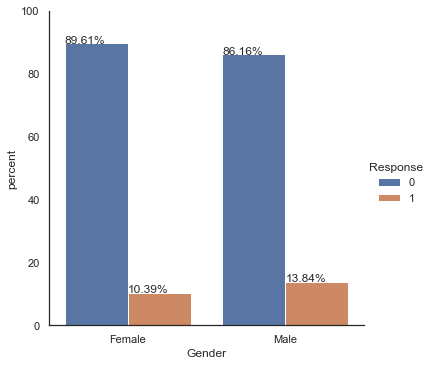

In [8]:
# GENDER & RESPONSE

x,y = 'Gender', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

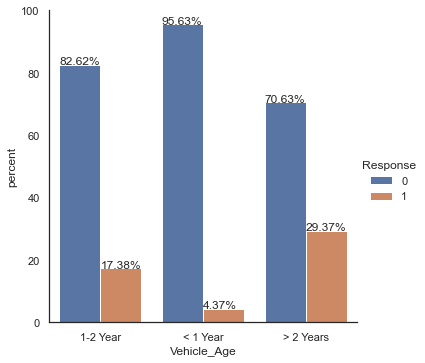

In [9]:
# RESPONSE & VA 

x,y = 'Vehicle_Age', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

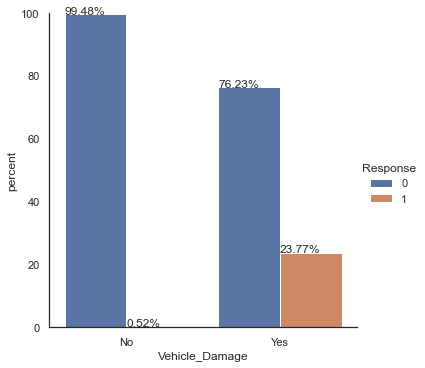

In [10]:
# RESPONSE & VD

x,y = 'Vehicle_Damage', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

## Missing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Duplicated Data

In [3]:
df.duplicated().sum()

0

### Log Transformation Annual Premium

In [7]:
data_tes = df

Text(0.5, 0, '')

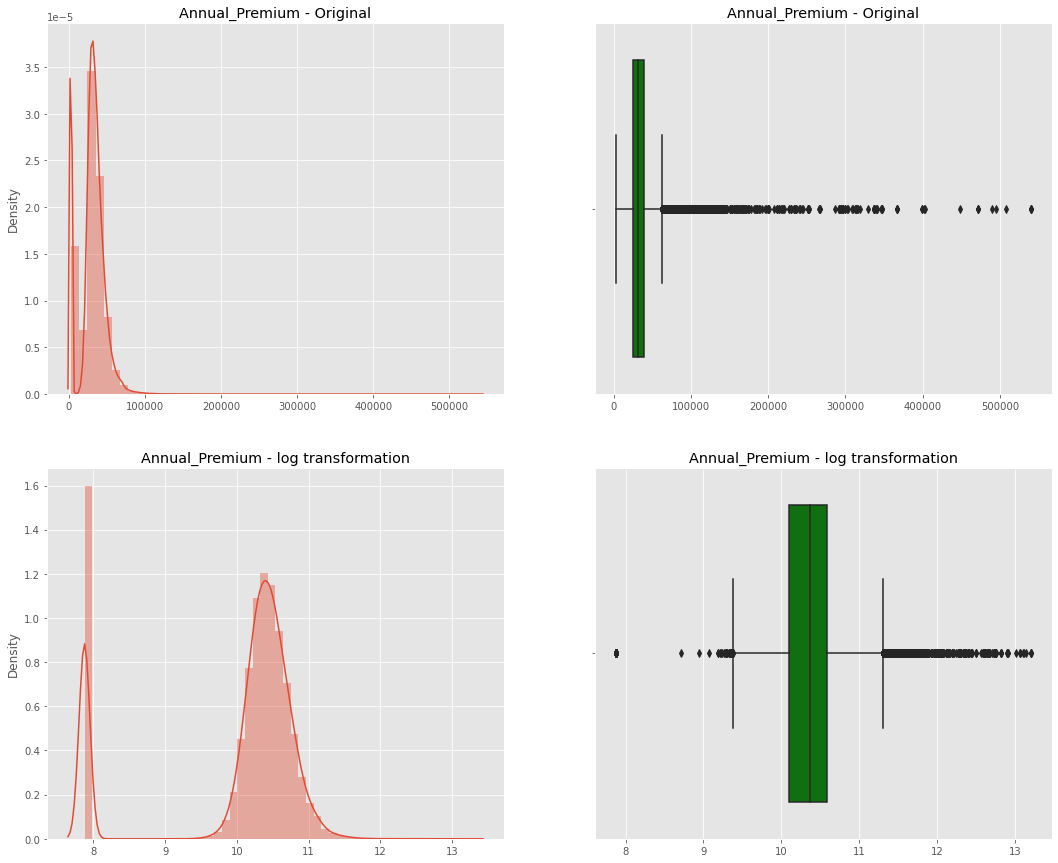

In [8]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_tes['Annual_Premium'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Annual_Premium - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_tes['Annual_Premium'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Annual_Premium - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_tes['Annual_Premium']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Annual_Premium - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_tes['Annual_Premium']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Annual_Premium - log transformation')
ax[1,1].set_xlabel('')


## Handling Outliers

<AxesSubplot:ylabel='Annual_Premium'>

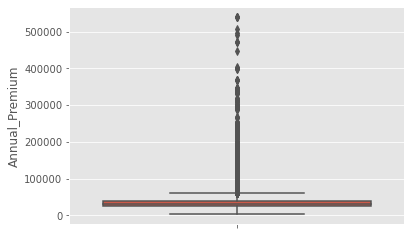

In [12]:
#OUTLIER

sns.boxplot(y = 'Annual_Premium', data = data_tes)

In [6]:
# skewness along the index axis
data_tes.skew(axis = 0)

id                      9.443274e-16
Age                     6.725390e-01
Driving_License        -2.159518e+01
Region_Code            -1.152664e-01
Previously_Insured      1.677471e-01
Annual_Premium          1.766087e+00
Policy_Sales_Channel   -9.000081e-01
Vintage                 3.029517e-03
Response                2.301906e+00
dtype: float64

In [9]:
#Berdasarkan Metode IQR 

print(f'Jumlah baris sebelum memfilter outlier: {len(data_tes)}')
filtered_entries = np.array([True] * len(data_tes))

Q1 = data_tes['Annual_Premium'].quantile(0.25)
Q3 = data_tes['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entities = ((data_tes['Annual_Premium'] >= low_limit) & (data_tes['Annual_Premium'] <= high_limit))
df_iqr = data_tes[filtered_entities]

print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 370789


## Feature Engineering

In [10]:
# < 1 year = 164786 (43.24%) || 1-2 year = 200316 (52.56%) || > 2 Years = 16007 (4.20%)
df_fe = df_iqr.copy()

merged_value = ['> 2 Years', '1-2 Year']
df_fe['Vehicle_Age'] = np.where(df_fe['Vehicle_Age'].isin(merged_value), '> 1 Year', '< 1 Year')

In [9]:
df_fe.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 1 Year,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,> 1 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 1 Year,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Feature Transformation

In [94]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [95]:
df_fe.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 1 Year,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,> 1 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 1 Year,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
# Fungsi normalisasi atau standardisasi
def normalize_standardize(data, op = 'standardize'):
  if (op == 'standardize'):
    sc_data = StandardScaler().fit_transform(data.values.reshape(len(data),1 ))
    return sc_data
  elif (op == 'normalize'):
    sc_data = StandardScaler().MinMaxScaler().fit_transform(data.values.reshape(len(data),1 ))
    return sc_data
  else:
    print("Operasi yang dimasukan bukan 'normalze' atau 'standardize'. Silakan coba lagi...")
    return 0

In [12]:
# Pisahin antara numerik yang mau distandardisasi, ngilangin id, driving_license, previously_insured, dan response
numerical_column = ['Age', 'Annual_Premium','Vintage']

# Pisahin kolom string (objek)
object_column = list(df.select_dtypes(include = ['object']).columns)

# Bikin dataframe baru biar ga harus ulang dari awal kalau error
df_std = df_fe

# Standardisasi setiap kolom
for feature in numerical_column:
  df_std[feature] = normalize_standardize(df_std[feature], 'standardize')

# Tampilkan data setelah standardisasi
df_std

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,0.345182,1,28.0,0,> 1 Year,Yes,0.758959,26.0,0.748826,1
1,2,Male,2.417701,1,3.0,0,> 1 Year,No,0.289720,26.0,0.342470,0
2,3,Male,0.539480,1,28.0,0,> 1 Year,Yes,0.612449,26.0,-1.521990,1
3,4,Male,-1.144442,1,11.0,1,< 1 Year,No,-0.043793,152.0,0.581503,0
4,5,Female,-0.626312,1,41.0,1,< 1 Year,No,-0.119965,152.0,-1.378570,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,2.288169,1,26.0,1,> 1 Year,No,0.061409,26.0,-0.792938,0
381105,381106,Male,-0.561545,1,37.0,1,< 1 Year,No,0.729250,152.0,-0.279017,0
381106,381107,Male,-1.144442,1,30.0,1,< 1 Year,No,0.397025,160.0,0.079533,0
381107,381108,Female,1.899571,1,14.0,0,> 1 Year,Yes,1.041329,124.0,-0.960262,0


## Feature Encoding

In [12]:
df_std.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,0.345182,1,28.0,0,> 1 Year,Yes,0.758959,26.0,0.748826,1
1,2,Male,2.417701,1,3.0,0,> 1 Year,No,0.289720,26.0,0.342470,0
2,3,Male,0.539480,1,28.0,0,> 1 Year,Yes,0.612449,26.0,-1.521990,1
3,4,Male,-1.144442,1,11.0,1,< 1 Year,No,-0.043793,152.0,0.581503,0
4,5,Female,-0.626312,1,41.0,1,< 1 Year,No,-0.119965,152.0,-1.378570,0


In [13]:
# LABEL ENCODING

#gender
mapping_gender = {
    'Male': 1,
    'Female': 0
}
df_std['Gender_Male'] = df_std['Gender'].map(mapping_gender)

#Vehicle age 
mapping_VA = {
    '> 1 Year': 1,
    '< 1 Year': 0
}
df_std['Vehicle_Age_> 1 Year'] = df_std['Vehicle_Age'].map(mapping_VA)

#Vehicle damage
mapping_VD = {
    'Yes': 1,
    'No': 0
}
df_std['Vehicle_Damage'] = df_std['Vehicle_Damage'].map(mapping_VD)

In [100]:
df_std.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_> 1 Year
0,1,Male,0.345182,1,28.0,0,> 1 Year,1,0.758959,26.0,0.748826,1,1,1
1,2,Male,2.417701,1,3.0,0,> 1 Year,0,0.289720,26.0,0.342470,0,1,1
2,3,Male,0.539480,1,28.0,0,> 1 Year,1,0.612449,26.0,-1.521990,1,1,1
3,4,Male,-1.144442,1,11.0,1,< 1 Year,0,-0.043793,152.0,0.581503,0,1,0
4,5,Female,-0.626312,1,41.0,1,< 1 Year,0,-0.119965,152.0,-1.378570,0,0,0


In [12]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    370789 non-null  int64  
 1   Gender                370789 non-null  object 
 2   Age                   370789 non-null  float64
 3   Driving_License       370789 non-null  int64  
 4   Region_Code           370789 non-null  float64
 5   Previously_Insured    370789 non-null  int64  
 6   Vehicle_Age           370789 non-null  object 
 7   Vehicle_Damage        370789 non-null  int64  
 8   Annual_Premium        370789 non-null  float64
 9   Policy_Sales_Channel  370789 non-null  float64
 10  Vintage               370789 non-null  float64
 11  Response              370789 non-null  int64  
 12  Gender_Male           370789 non-null  int64  
 13  Vehicle_Age_> 1 Year  370789 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 42.

In [14]:
df_std['Region_Code'] = df_std['Region_Code'].astype(str)
df_std['Policy_Sales_Channel'] = df_std['Policy_Sales_Channel'].astype(str)

In [15]:
# make list with top 5 variables in Region Code
df_t5 = [x for x in df_std.Region_Code.value_counts().sort_values(ascending=False).head(5).index]
df_t5

['28.0', '8.0', '46.0', '41.0', '15.0']

In [16]:
# for all categorical variables we selected
def top_x(df2,variable,top_x_labels):
    for label in top_x_labels:
        df2[variable+'_'+label] = np.where(df_std[variable]==label,1,0)

top_x(df_std,'Region_Code',df_t5)
# display data
df_std.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_> 1 Year,Region_Code_28.0,Region_Code_8.0,Region_Code_46.0,Region_Code_41.0,Region_Code_15.0
0,1,Male,0.345182,1,28.0,0,> 1 Year,1,0.758959,26.0,0.748826,1,1,1,1,0,0,0,0
1,2,Male,2.417701,1,3.0,0,> 1 Year,0,0.289720,26.0,0.342470,0,1,1,0,0,0,0,0
2,3,Male,0.539480,1,28.0,0,> 1 Year,1,0.612449,26.0,-1.521990,1,1,1,1,0,0,0,0
3,4,Male,-1.144442,1,11.0,1,< 1 Year,0,-0.043793,152.0,0.581503,0,1,0,0,0,0,0,0
4,5,Female,-0.626312,1,41.0,1,< 1 Year,0,-0.119965,152.0,-1.378570,0,0,0,0,0,0,1,0


In [17]:
# make list with top 5 variables in Policy Sales Channel
df_t5p = [x for x in df_std.Policy_Sales_Channel.value_counts().sort_values(ascending=False).head(5).index]
df_t5p

['152.0', '26.0', '124.0', '160.0', '156.0']

In [18]:
# for all categorical variables we selected
def top_x(df2,variable,top_x_labels):
    for label in top_x_labels:
        df2[variable+'_'+label] = np.where(df_std[variable]==label,1,0)

top_x(df_std,'Policy_Sales_Channel',df_t5p)
# display data
df_std.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Region_Code_28.0,Region_Code_8.0,Region_Code_46.0,Region_Code_41.0,Region_Code_15.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_156.0
0,1,Male,0.345182,1,28.0,0,> 1 Year,1,0.758959,26.0,...,1,0,0,0,0,0,1,0,0,0
1,2,Male,2.417701,1,3.0,0,> 1 Year,0,0.289720,26.0,...,0,0,0,0,0,0,1,0,0,0
2,3,Male,0.539480,1,28.0,0,> 1 Year,1,0.612449,26.0,...,1,0,0,0,0,0,1,0,0,0
3,4,Male,-1.144442,1,11.0,1,< 1 Year,0,-0.043793,152.0,...,0,0,0,0,0,1,0,0,0,0
4,5,Female,-0.626312,1,41.0,1,< 1 Year,0,-0.119965,152.0,...,0,0,0,1,0,1,0,0,0,0


In [19]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          370789 non-null  int64  
 1   Gender                      370789 non-null  object 
 2   Age                         370789 non-null  float64
 3   Driving_License             370789 non-null  int64  
 4   Region_Code                 370789 non-null  object 
 5   Previously_Insured          370789 non-null  int64  
 6   Vehicle_Age                 370789 non-null  object 
 7   Vehicle_Damage              370789 non-null  int64  
 8   Annual_Premium              370789 non-null  float64
 9   Policy_Sales_Channel        370789 non-null  object 
 10  Vintage                     370789 non-null  float64
 11  Response                    370789 non-null  int64  
 12  Gender_Male                 370789 non-null  int64  
 13  Vehicle_Age_> 

### Drop Kolom Outdated

In [20]:
# Membuang kolom yang tidak digunakan
df_drop = df_std.drop(columns=['id','Vehicle_Age','Gender', 'Region_Code', 'Policy_Sales_Channel'])

In [21]:
df_drop.head()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_> 1 Year,Region_Code_28.0,Region_Code_8.0,Region_Code_46.0,Region_Code_41.0,Region_Code_15.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_156.0
0,0.345182,1,0,1,0.758959,0.748826,1,1,1,1,0,0,0,0,0,1,0,0,0
1,2.417701,1,0,0,0.289720,0.342470,0,1,1,0,0,0,0,0,0,1,0,0,0
2,0.539480,1,0,1,0.612449,-1.521990,1,1,1,1,0,0,0,0,0,1,0,0,0
3,-1.144442,1,1,0,-0.043793,0.581503,0,1,0,0,0,0,0,0,1,0,0,0,0
4,-0.626312,1,1,0,-0.119965,-1.378570,0,0,0,0,0,0,1,0,1,0,0,0,0


In [22]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         370789 non-null  float64
 1   Driving_License             370789 non-null  int64  
 2   Previously_Insured          370789 non-null  int64  
 3   Vehicle_Damage              370789 non-null  int64  
 4   Annual_Premium              370789 non-null  float64
 5   Vintage                     370789 non-null  float64
 6   Response                    370789 non-null  int64  
 7   Gender_Male                 370789 non-null  int64  
 8   Vehicle_Age_> 1 Year        370789 non-null  int64  
 9   Region_Code_28.0            370789 non-null  int32  
 10  Region_Code_8.0             370789 non-null  int32  
 11  Region_Code_46.0            370789 non-null  int32  
 12  Region_Code_41.0            370789 non-null  int32  
 13  Region_Code_15

### Merubah Nama Kolom RC dan PSC

In [23]:
# Mengubah nama kolom region code
df_drop.rename(columns={"Region_Code_28.0":"Region_Rae-Bareli"},inplace=True)
df_drop.rename(columns={"Region_Code_8.0":"Region_Baghpat"},inplace=True)
df_drop.rename(columns={"Region_Code_46.0":"Region_Barabanki"},inplace=True)
df_drop.rename(columns={"Region_Code_41.0":"Region_Chitrakoot"},inplace=True)
df_drop.rename(columns={"Region_Code_15.0":"Region_Agra"},inplace=True)

In [24]:
# Mengubah nama kolom policy sales channel
df_drop.rename(columns={"Policy_Sales_Channel_152.0":"Email_Marketing"},inplace=True)
df_drop.rename(columns={"Policy_Sales_Channel_26.0":"Youtube_Adv"},inplace=True)
df_drop.rename(columns={"Policy_Sales_Channel_124.0":"Social_Media_Post"},inplace=True)
df_drop.rename(columns={"Policy_Sales_Channel_160.0":"Telepon"},inplace=True)
df_drop.rename(columns={"Policy_Sales_Channel_156.0":"Tiktok_Adv"},inplace=True)

In [25]:
df_drop.head()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_> 1 Year,Region_Rae-Bareli,Region_Baghpat,Region_Barabanki,Region_Chitrakoot,Region_Agra,Email_Marketing,Youtube_Adv,Social_Media_Post,Telepon,Tiktok_Adv
0,0.345182,1,0,1,0.758959,0.748826,1,1,1,1,0,0,0,0,0,1,0,0,0
1,2.417701,1,0,0,0.289720,0.342470,0,1,1,0,0,0,0,0,0,1,0,0,0
2,0.539480,1,0,1,0.612449,-1.521990,1,1,1,1,0,0,0,0,0,1,0,0,0
3,-1.144442,1,1,0,-0.043793,0.581503,0,1,0,0,0,0,0,0,1,0,0,0,0
4,-0.626312,1,1,0,-0.119965,-1.378570,0,0,0,0,0,0,1,0,1,0,0,0,0


## Class Imbalance

<AxesSubplot:xlabel='Response', ylabel='count'>

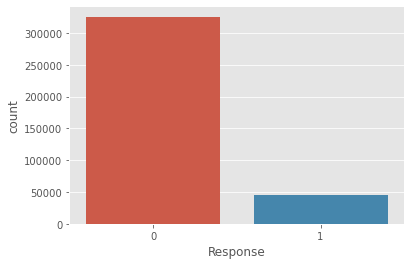

In [26]:
# Sebelum handling class imbalance
sns.countplot(x = 'Response', data = df_drop)

In [27]:
from imblearn import under_sampling, over_sampling

# Pemisahan fitur dan target
X = df_drop.drop(['Response'],axis=1)
x_columns = list(X.columns)
y = df_drop['Response']

# Under sampling
X_under, y_under = under_sampling.RandomUnderSampler(random_state=42).fit_resample(X, y)

# Mengubah numpy array ke Dataframe agar bisa diconcat
X_under = pd.DataFrame(X_under)
y_under = pd.DataFrame(y_under)

# Rename
X_under.columns = x_columns
y_under = y_under.rename(columns = {0: 'Response'})

# Concat dan buat dataframe baru
df_under = pd.concat([X_under,y_under], axis = 1)

df_under.head()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Male,Vehicle_Age_> 1 Year,Region_Rae-Bareli,Region_Baghpat,Region_Barabanki,Region_Chitrakoot,Region_Agra,Email_Marketing,Youtube_Adv,Social_Media_Post,Telepon,Tiktok_Adv,Response
0,-1.144442,1,1,0,0.083521,0.007823,0,0,0,0,1,0,0,1,0,0,0,0,0
1,-0.885377,1,1,0,0.443623,1.382264,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.863312,1,1,1,-0.163036,-0.589760,1,1,0,0,1,0,0,0,1,0,0,0,0
3,-0.691078,1,1,0,1.992083,-1.521990,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.345182,1,0,1,0.270253,0.569551,0,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Response', ylabel='count'>

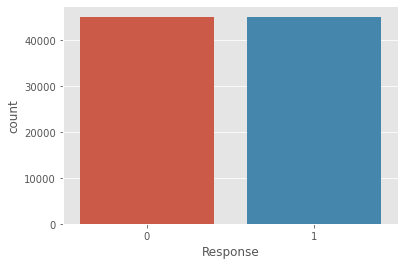

In [28]:
# Setelah class imbalance
sns.countplot(x = 'Response', data = df_under)

In [29]:
print(df_under['Response'].value_counts())
print(df_under.shape)

0    45155
1    45155
Name: Response, dtype: int64
(90310, 19)


### Penentuan Fitur

<AxesSubplot:>

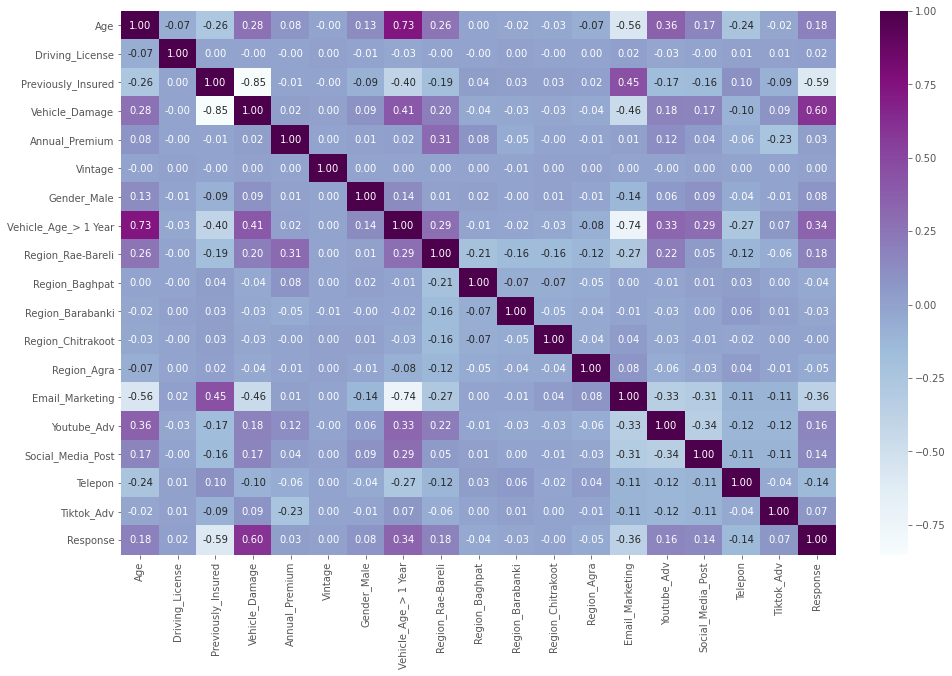

In [118]:
df_final = df_under

features = list(df_final.columns)
corr_= df_final[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Pada tahap awal, digunakan seluruh fitur dan membagi fitur-fitur berdasarkan tipe numerik dan kategori. Setelah melakukan Data Cleaning, selanjutnya fitur-fitur tersebut dilakukan fitur engineering, fitur transformation, dan fitur encoding. Setelah semua proses dilakukan, kami menemukan hanya beberapa fitur saja yang memiliki korelasi cukup tinggi. Berikut fitur yang akan digunakan dan di drop: 


a. Fitur yang di pakai:
   - Vehicle Damage (Yes)
   - Previously Insured
   - Vehicle Age (> 1 Year)
   - Age (standarisasi)


b. Fitur yang di drop:
   - id
   - Age > melakukan fitur transformasi menggunakan standarisasi
   - Vintage > melakukan fitur transformasi menggunakan standarisasi
   - Annual Premium > melakukan fitur transformasi menggunakan normalisasi

# Stage 3

In [30]:
df_model = df_under.copy()

In [31]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90310 entries, 0 to 90309
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   90310 non-null  float64
 1   Driving_License       90310 non-null  int64  
 2   Previously_Insured    90310 non-null  int64  
 3   Vehicle_Damage        90310 non-null  int64  
 4   Annual_Premium        90310 non-null  float64
 5   Vintage               90310 non-null  float64
 6   Gender_Male           90310 non-null  int64  
 7   Vehicle_Age_> 1 Year  90310 non-null  int64  
 8   Region_Rae-Bareli     90310 non-null  int32  
 9   Region_Baghpat        90310 non-null  int32  
 10  Region_Barabanki      90310 non-null  int32  
 11  Region_Chitrakoot     90310 non-null  int32  
 12  Region_Agra           90310 non-null  int32  
 13  Email_Marketing       90310 non-null  int32  
 14  Youtube_Adv           90310 non-null  int32  
 15  Social_Media_Post  

# Research Model

In [32]:
#Import Library Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [33]:
#Import Library Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

# Split Data Train & Test

In [34]:
import pandas as pd

dataset = pd.read_csv("train.csv")
X = df_model.drop(['Response'],axis=1)
y = df_model[['Response']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Naive Bayes

Naive Bayes is a classification technique based on the Bayes theorem. It is a simple but powerful algorithm for predictive modeling under supervised learning algorithms. The technique behind Naive Bayes is easy to understand. Naive Bayes has higher accuracy and speed when we have large data points.

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [33]:
#------------------------------naive bayes---------------------------
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state=94)

NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 

trainscoreNB =  NBmodel.score(X_train, y_train)
testscoreNB =  NBmodel.score(X_test, y_test)  

In [34]:
y_predNBTest =  NBmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predNBTest),'\n')
print(confusion_matrix(y_test, y_predNBTest))

 f1 score:  0.8042923668758858 

[[7814 3508]
 [1325 9931]]


In [35]:
y_predNBTrain =  NBmodel.predict(X_train)
print(' f1 score: ',f1_score(y_train, y_predNBTrain),'\n')
print(confusion_matrix(y_train, y_predNBTrain))

 f1 score:  0.806948091294688 

[[23431 10402]
 [ 3935 29964]]


In [36]:
print(' precision score: ',precision_score(y_test, y_predNBTest),'\n')
print(' recall score: ',recall_score(y_test, y_predNBTest),'\n')
print(classification_report(y_test, y_predNBTest))

 precision score:  0.7389686732643798 

 recall score:  0.8822850035536602 

              precision    recall  f1-score   support

           0       0.86      0.69      0.76     11322
           1       0.74      0.88      0.80     11256

    accuracy                           0.79     22578
   macro avg       0.80      0.79      0.78     22578
weighted avg       0.80      0.79      0.78     22578



In [37]:
print(' precision score: ',precision_score(y_train, y_predNBTrain),'\n')
print(' recall score: ',recall_score(y_train, y_predNBTrain),'\n')
print(classification_report(y_train, y_predNBTrain))

 precision score:  0.7423078828717238 

 recall score:  0.8839198796424673 

              precision    recall  f1-score   support

           0       0.86      0.69      0.77     33833
           1       0.74      0.88      0.81     33899

    accuracy                           0.79     67732
   macro avg       0.80      0.79      0.79     67732
weighted avg       0.80      0.79      0.79     67732



0.8267158962459072


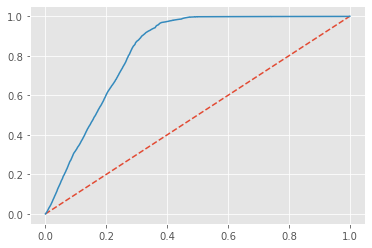

In [38]:
#-------------------------------------- ROC | AUC naive bayes -------------------------------------
probabilityValues = NBmodel.predict_proba(X)[:,1]
#Calculate AUC
auc = roc_auc_score(y,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

## Random forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
#------------------------Random Forest-----------------------
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

RFmodel =  RandomForestClassifier(criterion='entropy',max_depth=1) 
RFmodel.fit(X_train, y_train)

trainscoreRF =  RFmodel.score(X_train, y_train)
testscoreRF =  RFmodel.score(X_test, y_test)

In [58]:
y_predRFTest =  RFmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predRFTest),'\n')
print(confusion_matrix(y_test, y_predRFTest))

 f1 score:  0.8 

[[5831 3245]
 [ 832 8154]]


In [57]:
y_predRFTrain =  RFmodel.predict(X_train)
print(' f1 score: ',f1_score(y_train, y_predRFTrain),'\n')
print(confusion_matrix(y_train, y_predRFTrain))

 f1 score:  0.8044406908285291 

[[23410 12669]
 [ 3308 32861]]


In [59]:
print(' precision score: ',precision_score(y_test, y_predRFTest),'\n')
print(' recall score: ',recall_score(y_test, y_predRFTest),'\n')
print(classification_report(y_test, y_predRFTest))

 precision score:  0.7153259057812089 

 recall score:  0.9074115290451814 

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      9076
           1       0.72      0.91      0.80      8986

    accuracy                           0.77     18062
   macro avg       0.80      0.77      0.77     18062
weighted avg       0.80      0.77      0.77     18062



In [60]:
print(' precision score: ',precision_score(y_train, y_predRFTrain),'\n')
print(' recall score: ',recall_score(y_train, y_predRFTrain),'\n')
print(classification_report(y_train, y_predRFTrain))

 precision score:  0.721743905117505 

 recall score:  0.9085404628272831 

              precision    recall  f1-score   support

           0       0.88      0.65      0.75     36079
           1       0.72      0.91      0.80     36169

    accuracy                           0.78     72248
   macro avg       0.80      0.78      0.78     72248
weighted avg       0.80      0.78      0.78     72248



0.8224672783656476


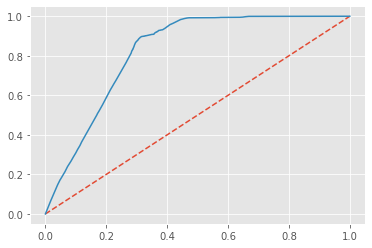

In [61]:
#-------------------------------------- ROC | AUC Random Forest -------------------------------------
probabilityValues = RFmodel.predict_proba(X)[:,1]
#Calculate AUC
auc = roc_auc_score(y,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

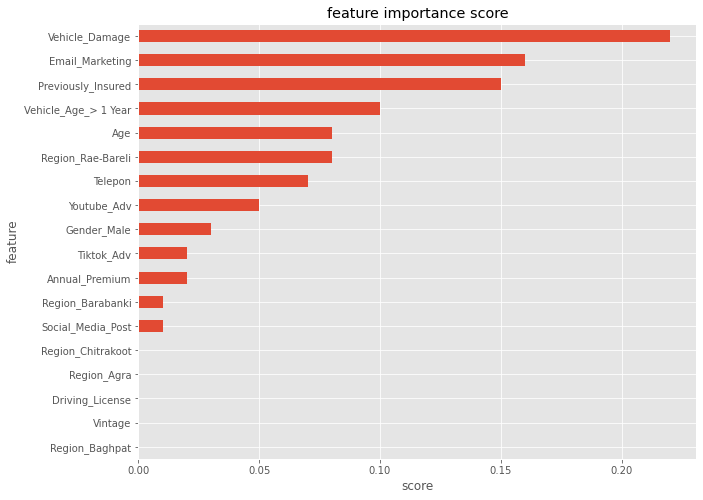

In [62]:
#entropy
show_feature_importance(RFmodel)

## Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [63]:
from sklearn.linear_model import LogisticRegression

#LR_model = LogisticRegression()
#LR_model.fit(X_train, y_train)

In [64]:
#------------------------LogisticRegression-----------------------
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=70)

LRmodel = LogisticRegression(solver='liblinear')  
LRmodel.fit(X_train, y_train)

trainscoreLR =  LRmodel.score(X_train, y_train)
testscoreLR =  LRmodel.score(X_test, y_test)  

In [65]:
y_predLRTest =  LRmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predLRTest),'\n')
print(confusion_matrix(y_test, y_predLRTest))

 f1 score:  0.8209586827729476 

[[ 7254  4100]
 [  554 10670]]


In [66]:
y_predLRTrain =  LRmodel.predict(X_train)
print(' f1 score: ',f1_score(y_train, y_predLRTrain),'\n')
print(confusion_matrix(y_train, y_predLRTrain))

 f1 score:  0.8212923864363404 

[[21674 12127]
 [ 1839 32092]]


In [67]:
print(' precision score: ',precision_score(y_test, y_predLRTest),'\n')
print(' recall score: ',recall_score(y_test, y_predLRTest),'\n')
print(classification_report(y_test, y_predLRTest))

 precision score:  0.7224102911306702 

 recall score:  0.9506414825374199 

              precision    recall  f1-score   support

           0       0.93      0.64      0.76     11354
           1       0.72      0.95      0.82     11224

    accuracy                           0.79     22578
   macro avg       0.83      0.79      0.79     22578
weighted avg       0.83      0.79      0.79     22578



In [68]:
print(' precision score: ',precision_score(y_train, y_predLRTrain),'\n')
print(' recall score: ',recall_score(y_train, y_predLRTrain),'\n')
print(classification_report(y_train, y_predLRTrain))

 precision score:  0.7257513738438228 

 recall score:  0.9458017741887949 

              precision    recall  f1-score   support

           0       0.92      0.64      0.76     33801
           1       0.73      0.95      0.82     33931

    accuracy                           0.79     67732
   macro avg       0.82      0.79      0.79     67732
weighted avg       0.82      0.79      0.79     67732



0.8463854131246227


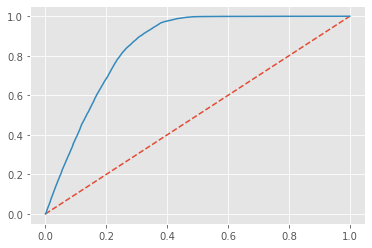

In [69]:
#-------------------------------------- ROC | AUC LogisticRegression -------------------------------------
probabilityValues = LRmodel.predict_proba(X)[:,1]
#Calculate AUC
auc = roc_auc_score(y,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

## KNN

KNN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
#------------------------KNN-----------------------
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train,y_train)

trainscoreKNN =  KNNmodel.score(X_train, y_train)
testscoreKNN =  KNNmodel.score(X_test, y_test)  

In [73]:
y_predKNNTest =  KNNmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predKNNTest),'\n')
print(confusion_matrix(y_test, y_predKNNTest))

 f1 score:  0.779649818301949 

[[7802 3576]
 [1760 9440]]


In [74]:
y_predKNNTrain =  KNNmodel.predict(X_train)
print(' f1 score: ',f1_score(y_train, y_predKNNTrain),'\n')
print(confusion_matrix(y_train, y_predKNNTrain))

 f1 score:  0.8439463359762955 

[[25595  8182]
 [ 3194 30761]]


In [75]:
print(' precision score: ',precision_score(y_test, y_predKNNTest),'\n')
print(' recall score: ',recall_score(y_test, y_predKNNTest),'\n')
print(classification_report(y_test, y_predKNNTest))

 precision score:  0.7252612169637369 

 recall score:  0.8428571428571429 

              precision    recall  f1-score   support

           0       0.82      0.69      0.75     11378
           1       0.73      0.84      0.78     11200

    accuracy                           0.76     22578
   macro avg       0.77      0.76      0.76     22578
weighted avg       0.77      0.76      0.76     22578



In [76]:
print(' precision score: ',precision_score(y_train, y_predKNNTrain),'\n')
print(' recall score: ',recall_score(y_train, y_predKNNTrain),'\n')
print(classification_report(y_train, y_predKNNTrain))

 precision score:  0.7898980561333231 

 recall score:  0.9059343248417022 

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     33777
           1       0.79      0.91      0.84     33955

    accuracy                           0.83     67732
   macro avg       0.84      0.83      0.83     67732
weighted avg       0.84      0.83      0.83     67732



0.8899206898920647


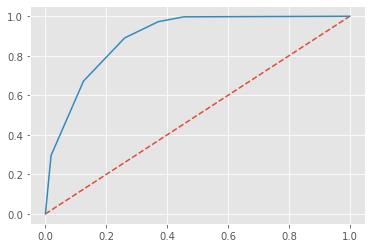

In [77]:
#--------------------------------------  ROC | AUC KNN -------------------------------------
probabilityValues = KNNmodel.predict_proba(X)[:,1]
#Calculate AUC
auc = roc_auc_score(y,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
#------------------------Decision Tree-----------------------
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=34)

DTmodel=  DecisionTreeClassifier(criterion = 'entropy',splitter = 'random',max_depth=1)  
DTmodel.fit(X_train, y_train)

trainscoreDT =  DTmodel.score(X_train, y_train)
testscoreDT =  DTmodel.score(X_test, y_test)  

In [80]:
y_predDTTest =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predDTTest),'\n')
print(confusion_matrix(y_test, y_predDTTest))

 f1 score:  0.8098143117958765 

[[4698 4243]
 [  28 9093]]


In [81]:
y_predDTTrain =  DTmodel.predict(X_train)
print(' f1 score: ',f1_score(y_train, y_predDTTrain),'\n')
print(confusion_matrix(y_train, y_predDTTrain))

 f1 score:  0.8049135863352088 

[[18934 17280]
 [  126 35908]]


In [82]:
print(' precision score: ',precision_score(y_test,y_predDTTest),'\n')
print(' recall score: ',recall_score(y_test, y_predDTTest),'\n')
print(classification_report(y_test, y_predDTTest))

 precision score:  0.6818386322735452 

 recall score:  0.9969301611665388 

              precision    recall  f1-score   support

           0       0.99      0.53      0.69      8941
           1       0.68      1.00      0.81      9121

    accuracy                           0.76     18062
   macro avg       0.84      0.76      0.75     18062
weighted avg       0.84      0.76      0.75     18062



In [83]:
print(' precision score: ',precision_score(y_train, y_predDTTrain),'\n')
print(' recall score: ',recall_score(y_train, y_predDTTrain),'\n')
print(classification_report(y_train, y_predDTTrain))

 precision score:  0.6751146875235016 

 recall score:  0.9965033024365877 

              precision    recall  f1-score   support

           0       0.99      0.52      0.69     36214
           1       0.68      1.00      0.80     36034

    accuracy                           0.76     72248
   macro avg       0.83      0.76      0.75     72248
weighted avg       0.83      0.76      0.74     72248



0.759971210275717


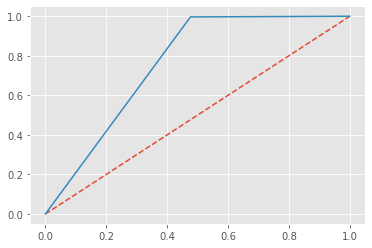

In [84]:
#--------------------------------------  ROC | AUC Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(X)[:,1]
#Calculate AUC
auc = roc_auc_score(y,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

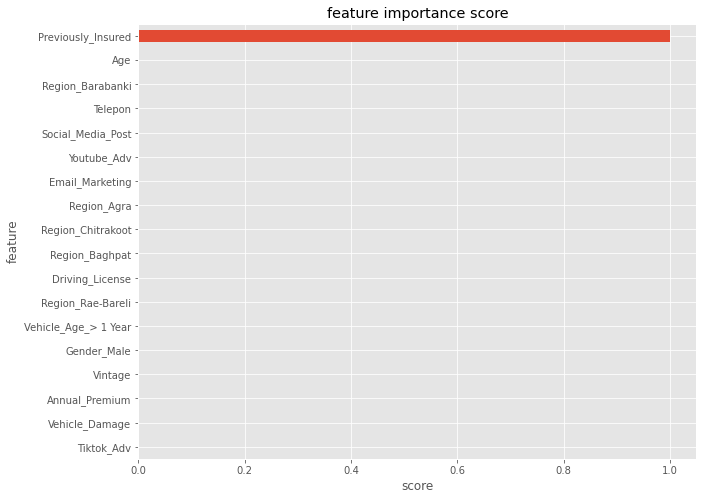

In [85]:
show_feature_importance(DTmodel)

## XGBoost

In [35]:
from xgboost import XGBClassifier

In [36]:
#------------------------XGBoost-----------------------
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state=70)
#eval_metric = 'auc'
XGmodel=  XGBClassifier(max_depth=3, learning_rate=0.1, eta=0.005, gamma=0.0, min_child_weight=5, colsample_bytree=0.7) 
XGmodel.fit(X_train, y_train)

trainscoreXG =  XGmodel.score(X_train, y_train)
testscoreXG =  XGmodel.score(X_test, y_test) 

[23:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
y_predXGTest =  XGmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predXGTest),'\n')
print(confusion_matrix(y_test, y_predXGTest))

 f1 score:  0.8206772503323688 

[[ 7498  3856]
 [  730 10494]]


In [38]:
y_predXGTrain =  XGmodel.predict(X_train)
print(' f1 score: ',f1_score(y_train, y_predXGTrain),'\n')
print(confusion_matrix(y_train, y_predXGTrain))

 f1 score:  0.8244443290402991 

[[22459 11342]
 [ 2180 31751]]


In [39]:
print(' precision score: ',precision_score(y_test, y_predXGTest),'\n')
print(' recall score: ',recall_score(y_test, y_predXGTest),'\n')
print(classification_report(y_test, y_predXGTest))

 precision score:  0.7312891986062717 

 recall score:  0.93496079828938 

              precision    recall  f1-score   support

           0       0.91      0.66      0.77     11354
           1       0.73      0.93      0.82     11224

    accuracy                           0.80     22578
   macro avg       0.82      0.80      0.79     22578
weighted avg       0.82      0.80      0.79     22578



In [40]:
print(' precision score: ',precision_score(y_train, y_predXGTrain),'\n')
print(' recall score: ',recall_score(y_train, y_predXGTrain),'\n')
print(classification_report(y_train, y_predXGTrain))

 precision score:  0.7368018007565034 

 recall score:  0.935751967227609 

              precision    recall  f1-score   support

           0       0.91      0.66      0.77     33801
           1       0.74      0.94      0.82     33931

    accuracy                           0.80     67732
   macro avg       0.82      0.80      0.80     67732
weighted avg       0.82      0.80      0.80     67732



0.8551038481228322


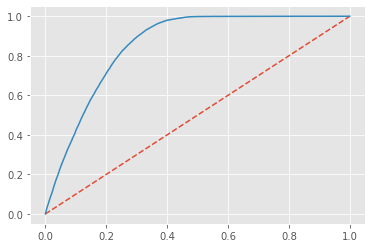

In [41]:
probabilityValues = XGmodel.predict_proba(X)[:,1]
#Calculate AUC
auc = roc_auc_score(y,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

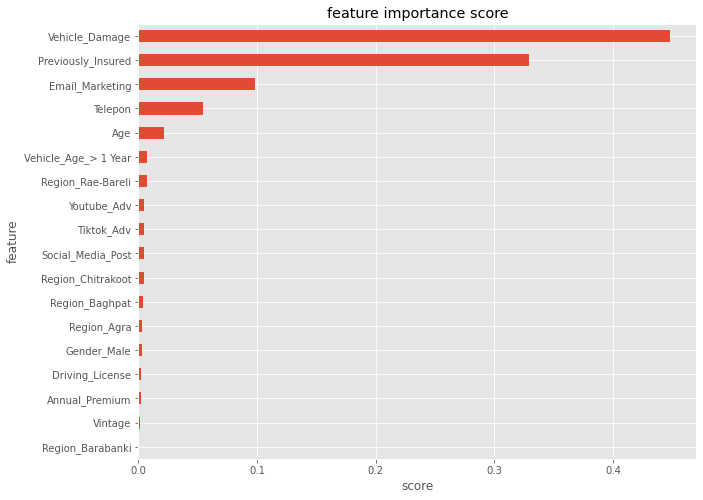

In [42]:
show_feature_importance(XGmodel)

## ExtraTreesClassifier

In [97]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.20, random_state=42)

ETCmodel = ExtraTreesClassifier()
ETCmodel2= ETCmodel.fit(X_train, y_train)

trainscoreETC =  ETCmodel2.score(X_train, y_train)
testscoreETC =  ETCmodel2.score(X_test, y_test) 

In [98]:
y_predETCTest =  ETCmodel2.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predETCTest),'\n')
print(confusion_matrix(y_test, y_predETCTest))

 f1 score:  0.7763185108583247 

[[6229 2847]
 [1479 7507]]


In [99]:
y_predETCTrain =  ETCmodel2.predict(X_train)
print(' f1 score: ',f1_score(y_train, y_predETCTrain),'\n')
print(confusion_matrix(y_train, y_predETCTrain))

 f1 score:  0.9987959644048328 

[[36076     3]
 [   84 36085]]


In [100]:
print(' precision score: ',precision_score(y_test, y_predETCTest),'\n')
print(' recall score: ',recall_score(y_test, y_predETCTest),'\n')
print(classification_report(y_test, y_predETCTest))

 precision score:  0.7250338033610199 

 recall score:  0.8354106387714222 

              precision    recall  f1-score   support

           0       0.81      0.69      0.74      9076
           1       0.73      0.84      0.78      8986

    accuracy                           0.76     18062
   macro avg       0.77      0.76      0.76     18062
weighted avg       0.77      0.76      0.76     18062



In [101]:
print(' precision score: ',precision_score(y_train, y_predETCTrain),'\n')
print(' recall score: ',recall_score(y_train, y_predETCTrain),'\n')
print(classification_report(y_train, y_predETCTrain))

 precision score:  0.9999168698736423 

 recall score:  0.9976775691890846 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36079
           1       1.00      1.00      1.00     36169

    accuracy                           1.00     72248
   macro avg       1.00      1.00      1.00     72248
weighted avg       1.00      1.00      1.00     72248



0.9915883842610499


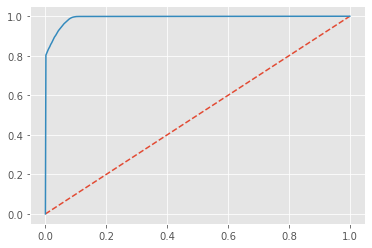

In [102]:
#-------------------------------------- ROC | AUC XGBoost -------------------------------------
probabilityValues = ETCmodel2.predict_proba(X)[:,1]
#Calculate AUC
auc = roc_auc_score(y,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

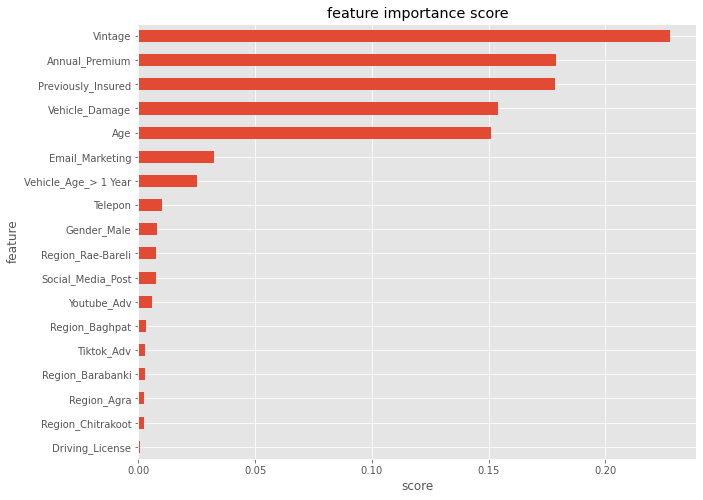

In [103]:
show_feature_importance(ETCmodel2)

In [104]:
df1_fin = pd.DataFrame({'NaiveBayes': [testscoreNB], 'RandomForest': [testscoreRF], 'LogisticRegression': [testscoreLR], 'KNN':[testscoreKNN], 'DecissionTree': [testscoreDT], 'XGBoost': [testscoreXG], 'ExtraTreesClassifier': [testscoreETC]})

In [105]:
df1_fin

,NaiveBayes,RandomForest,LogisticRegression,KNN,DecissionTree,XGBoost,ExtraTreesClassifier
0,0.785942,0.774277,0.79387,0.763664,0.763537,0.795819,0.760492


In [106]:
df1_fin2 = pd.DataFrame({'NaiveBayes': [trainscoreNB], 'RandomForest': [trainscoreRF], 'LogisticRegression': [trainscoreLR], 'KNN':[trainscoreKNN], 'DecissionTree': [trainscoreDT], 'XGBoost': [trainscoreXG], 'ExtraTreesClassifier': [trainscoreETC]})

In [107]:
df1_fin2

,NaiveBayes,RandomForest,LogisticRegression,KNN,DecissionTree,XGBoost,ExtraTreesClassifier
0,0.788328,0.778859,0.793805,0.832044,0.75908,0.797983,0.998796


#  2. Feature Importance

1. Feature importance (lihat feature yang paling penting, tarik business insight-nya, dan juga berikan action items berupa rekomendasi terhadap insight tersebut)
2. Feature selection dari feature importance, dan lakukan iterasi modeling dengan feature yang dipilih

#### Feature Selection

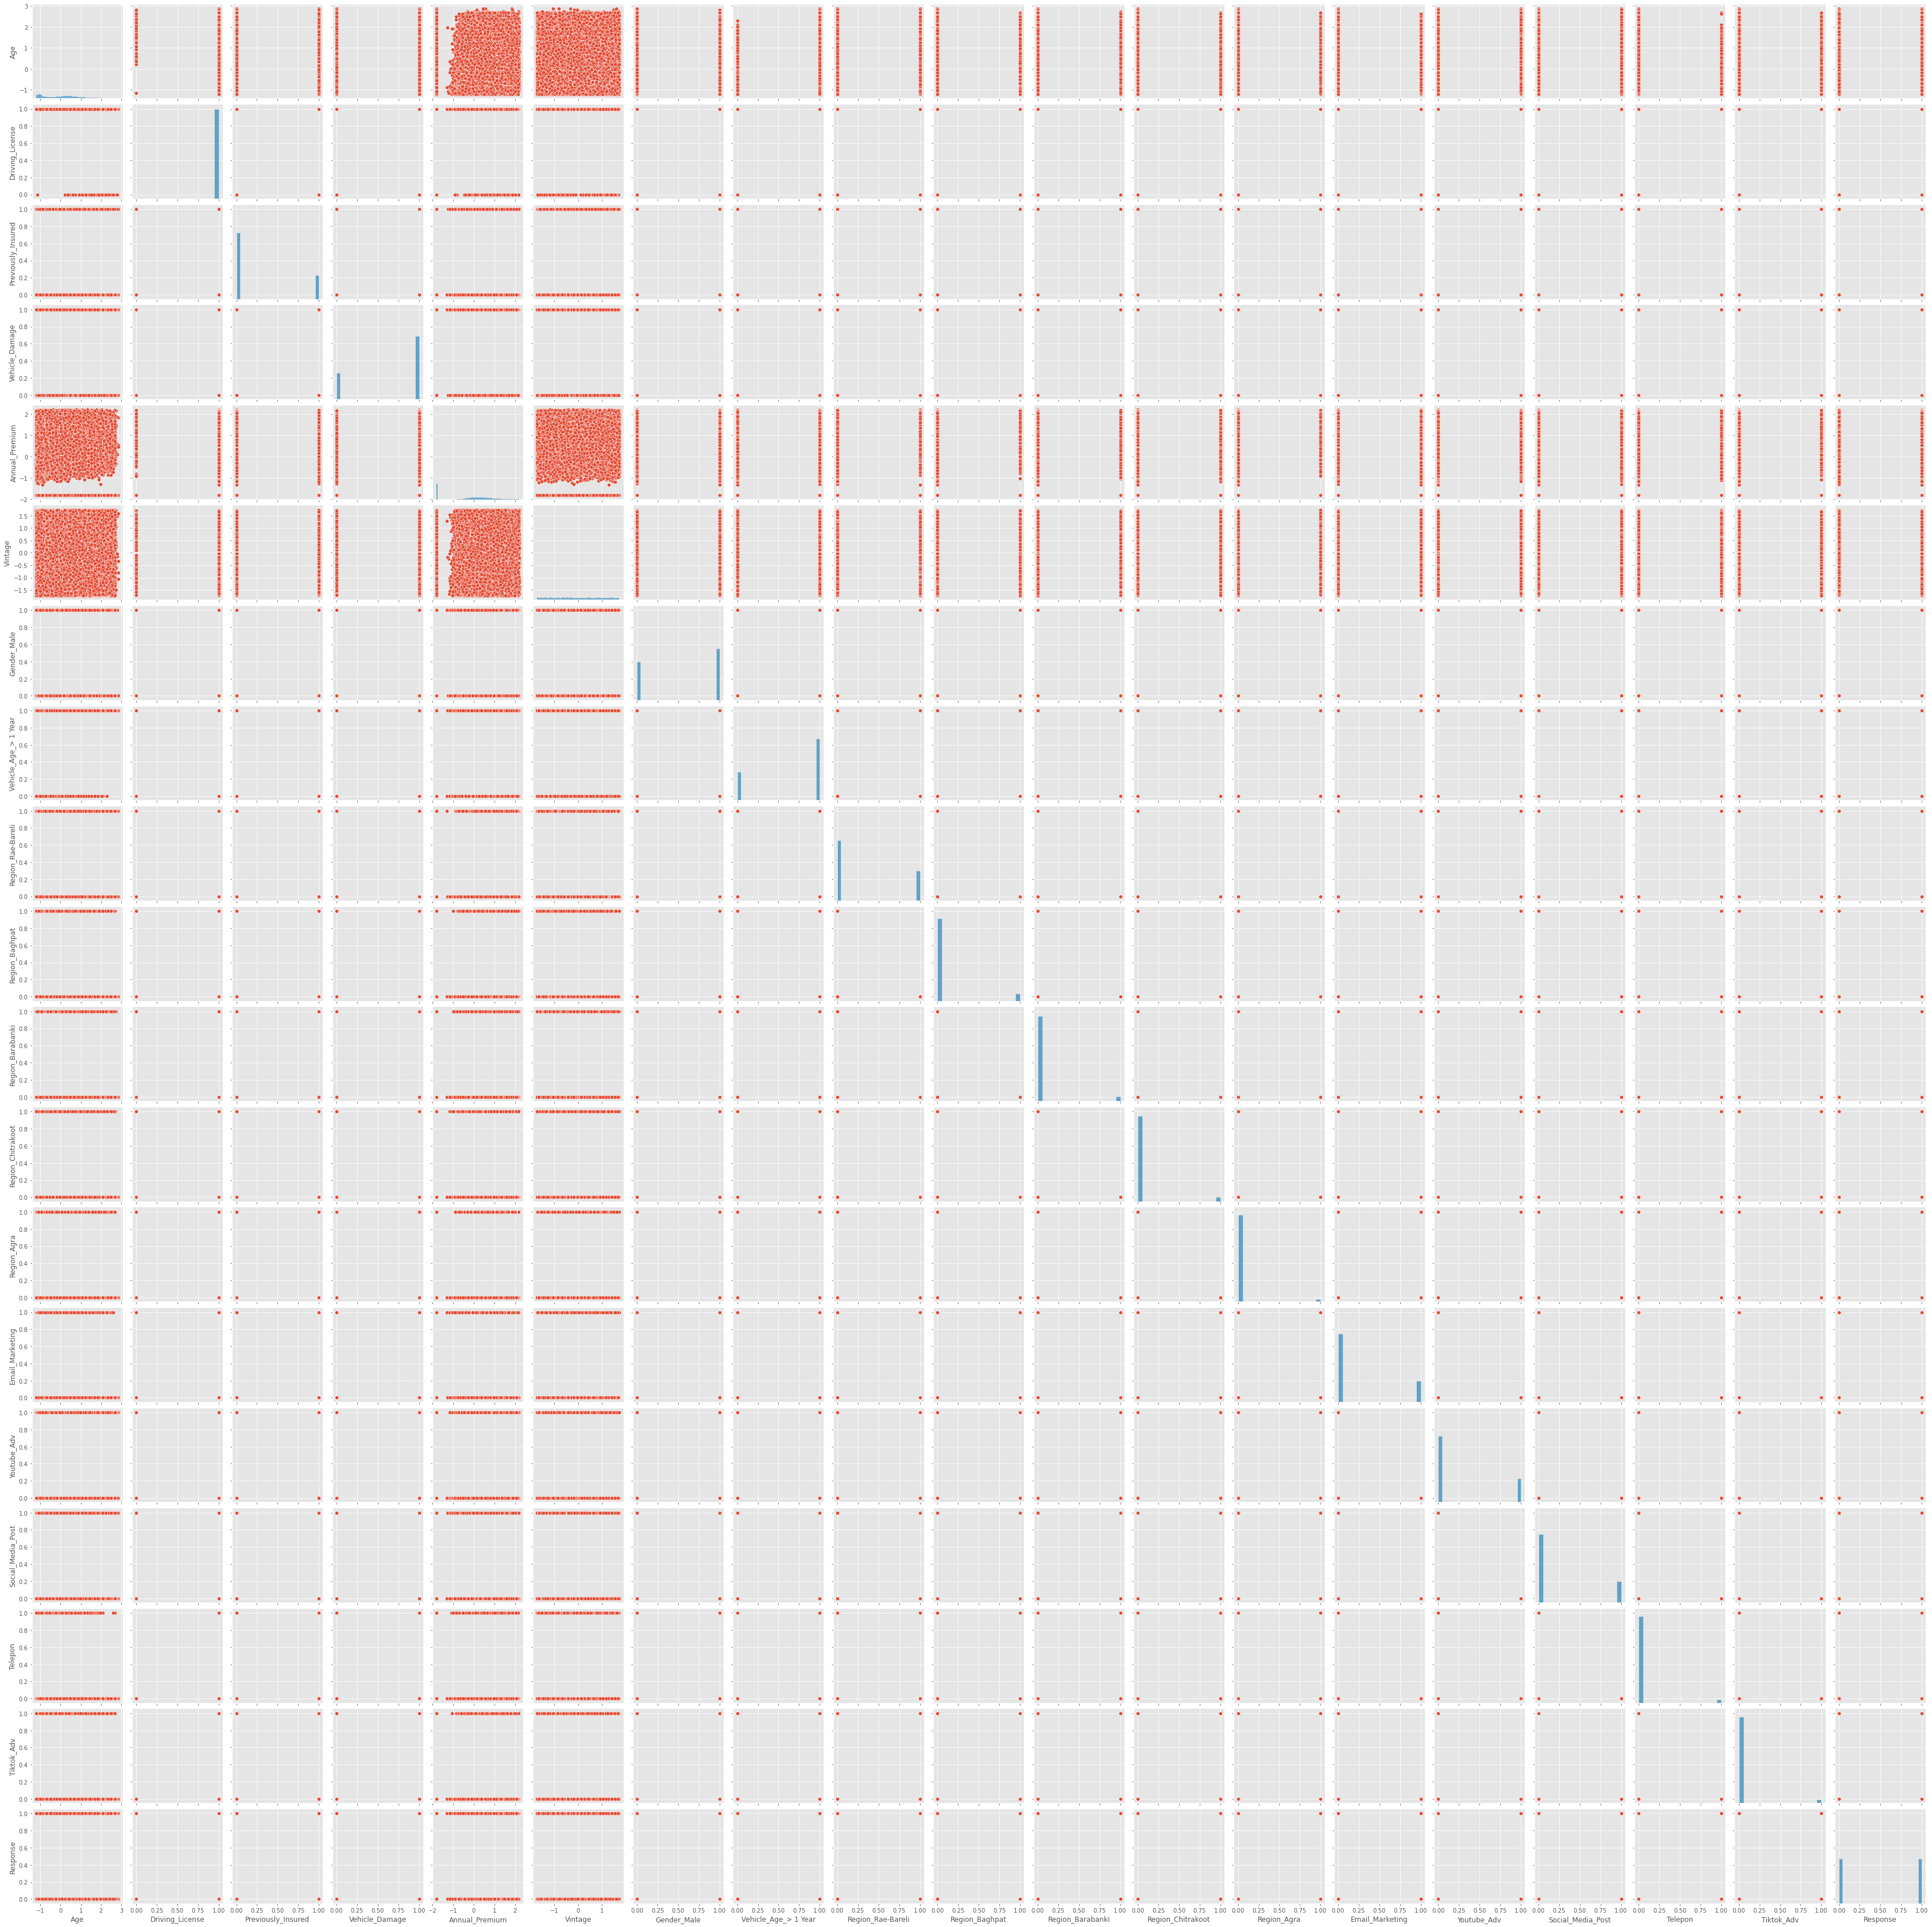

In [108]:
sns.pairplot(df_model)

show_feature_importance(XGmodel)# Model Evaluation

In [43]:
from sklearn.metrics import confusion_matrix
def make_confusion_matrix2(XGmodel):
    y_predX = XGmodel.predict(X_test)
    satisfaction_confusion = confusion_matrix(y_test, y_predX)
    plt.figure(dpi=120)
    ax = sns.heatmap(satisfaction_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Response', 'Response'],
           yticklabels=['Not Response', 'Response']);   
    plt.xlabel('Prediction',weight='bold',fontsize=12)
    plt.ylabel('Actual',weight='bold')

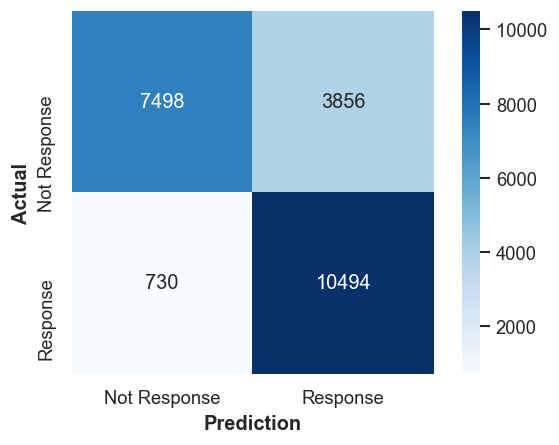

In [44]:
sns.set(style='white',font_scale=1)
make_confusion_matrix2(XGmodel)

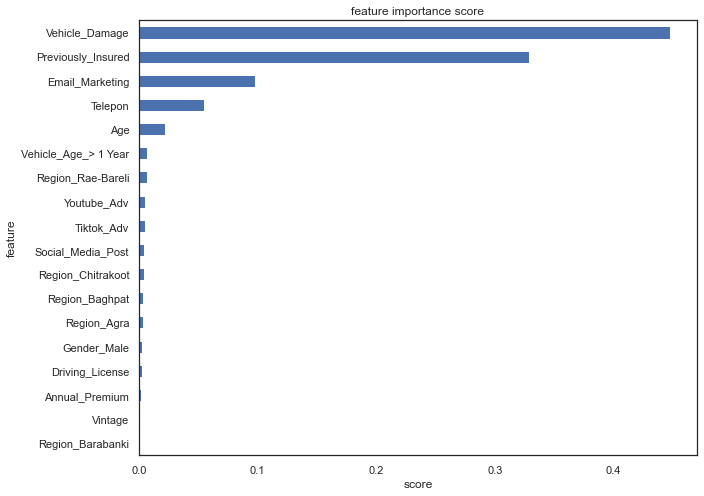

In [45]:
show_feature_importance(XGmodel)

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [47]:
# Split Feature and Label
X = df_model.drop(columns=['Response'], axis=1)
y = df_model['Response'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
# Select Features With Best ANOVA F-Values

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

In [49]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 18
Reduced number of features: 2
